## 7 idioms to acquire missing values every data scientist should know.
#### Commands you should bring to automatism. 


In [1]:
import pandas as pd
import numpy as np

In [2]:
wine_data = pd.read_csv('winemag-data_first150k.csv')

In [3]:
wine_data.shape

(150930, 11)

In [4]:
wine_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## 1. DataFrame.describe() (but not quite)

In [5]:
wine_data.describe(include='all').loc['count']

Unnamed: 0     150930
country        150925
description    150930
designation    105195
points         150930
price          137235
province       150925
region_1       125870
region_2        60953
variety        150930
winery         150930
Name: count, dtype: object

In [6]:
#or in percentage
wine_data.describe(include='all').loc['count'] / wine_data.shape[0] * 100

Unnamed: 0         100
country        99.9967
description        100
designation    69.6979
points             100
price          90.9263
province       99.9967
region_1       83.3963
region_2       40.3849
variety            100
winery             100
Name: count, dtype: object

In [7]:
#or with filters
wine_data.describe(include=np.object).loc['count'] / wine_data.shape[0] * 100

country        99.9967
description        100
designation    69.6979
province       99.9967
region_1       83.3963
region_2       40.3849
variety            100
winery             100
Name: count, dtype: object

In [8]:
wine_data.describe(include=[np.number]).loc['count'] / wine_data.shape[0] * 100

Unnamed: 0    100.000000
points        100.000000
price          90.926257
Name: count, dtype: float64

## 2. Series.value_counts() (but not quiet)

In [9]:
wine_data['country'].value_counts(dropna=False).loc[np.nan]

5

## 3. DataFrame.count()

In [10]:
wine_data.count()

Unnamed: 0     150930
country        150925
description    150930
designation    105195
points         150930
price          137235
province       150925
region_1       125870
region_2        60953
variety        150930
winery         150930
dtype: int64

In [11]:
wine_data.count()['country']

150925

## 4. isnull().sum() idiom

In [12]:
wine_data.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [13]:
wine_data.isna().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

## 5. isnull().sum().sum() (go deeper)

In [14]:
wine_data.isnull().sum().sum()

174477

In [15]:
wine_data.isnull().values.any()

True

## 6. Heatmap of NaNs

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

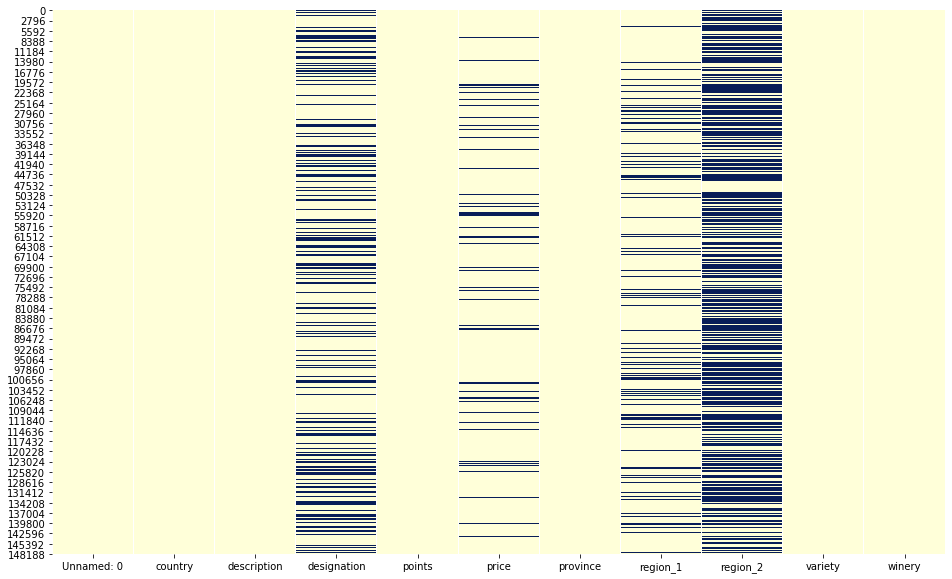

In [17]:
plt.figure(figsize=(16,10))
sns.heatmap(wine_data.isnull(), cbar=False, cmap="YlGnBu")

## 7. Indexes of missing values

In [18]:
wine_data['country'].isnull().to_numpy().nonzero()

(array([  1133,   1440,  68226, 113016, 135696], dtype=int64),)